# **AP155 Lab Assignment** 
## Module 5: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 3 are worth 25, 25, and 50 points, respectively).

_Due Date_: **5PM of December 7 (Tue)**


### Student Information 

_Full Name (Last Name, First Name)_: Salinas, Jose Enrico \
_Student No._: 201808184\
_Section_: THX2

In [1]:
# !pip install pytz
from datetime import datetime
from pytz import timezone
print("Last run: ", datetime.now(timezone("Asia/Manila")).strftime("%m/%d/%Y, %H:%M:%S"))

Last run:  12/02/2022, 17:42:53


### Submission Information

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** SALINAS, Jose Enrico

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/25
* Problem 2 - []/25
* Problem 3 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### PROBLEM 1 (25 pts.; 50/50 for code & discussion) 
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits. 

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(15 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$. 

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(10 pts.)*

---

The Lotka-Volterra model is a simple model relating the populations of prey and predator populations. The variable $x$ represents the prey population (we'll call these Rabbits) and $y$ represents the predator population (we'll call these Foxes), each in thousands. The constants are

*   $\alpha$ - Birth rate of rabbits
*   $\beta$ - Predation rate of rabbits
*   $\gamma$ - Growth rate of foxes
*   $\delta$ - Death rate of foxes

\
We can solve the Lotka-Volterra equations using the 4th order Runge-Kutta method. First, we define the right-hand side of each equation as some function of $x, y$. That is,

$$\begin{equation}f_x(x, y)=\frac{dx}{dt}=x-0.5xy\end{equation}$$ \\
$$\begin{equation}f_y(x, y)=\frac{dy}{dt}=0.5xy-2xy\end{equation}$$

In [ ]:
def fx(x, y):
    return 1*x - 0.5*x*y

def fy(x, y):
    return 0.5*x*y - 2*y

def f(r):
    x = r[0]
    y = r[1]
    return np.array([fx(x, y), fy(x, y)], float)

Next, we define the initial conditions $x=y=2.0$ and estimate the time evolution of the system over 30 days using the 4th-order Runge-Kutta method with 500 sampled points.

In [ ]:
# Initial conditions of the system
x0 = 2.0
y0 = 2.0

# Time range of estimate
a = 0.0
b = 30.0

# Number of samples and width
N = 500
h = (b - a)/N
ts = np.arange(a, b, h)
xs = []
ys = []
r = np.array([x0, y0], float)

for t in ts:
  xs.append(r[0])
  ys.append(r[1])
  k1 = h*f(r)
  k2 = h*f(r+0.5*k1)
  k3 = h*f(r+0.5*k2)
  k4 = h*f(r+k3)
  r += (k1+2*k2+2*k3+k4)/6

We now have estimates for each population for 500 points spread evenly over 30 days which we can plot to see the systems behavior.

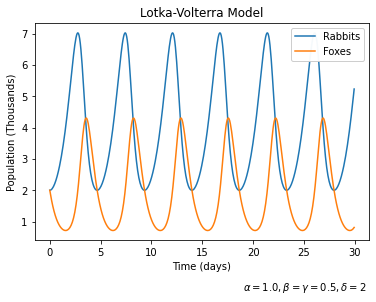

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(x=ts, y=xs, ax=ax, label="Rabbits")
sns.lineplot(x=ts, y=ys, ax=ax, label="Foxes")

ax.set_title("Lotka-Volterra Model")
ax.set_xlabel("Time (days)")
ax.set_ylabel("Population (Thousands)")
ax.legend(loc='best', fancybox=True, framealpha=0.96)

caption = r"$\alpha=1.0,\beta=\gamma=0.5,\delta=2$"
fig.text(0.75, -0.05, caption, ha='center')
plt.show()

From the plot, we can see that the Rabbit and Fox populations are oscillating functions with a period of about 5 days. We observe the following regimes:


1. The rabbit and fox population are at their initial state. The fox population declines and the rabbit population grows.
2. The rabbit population peaks at 7000 individuals and the fox population follows soon after, peaking 4000 individuals. 
3. When the fox population peaks, the rabbit population declines due to increased predation until a low of 2000.
4. As the rabbit population declines, the death rate of the fox population dominates until reaching the initial conditions. After which, the 1st regime repeats. 

Moreover, changes in any of the constants will modify the behavior of the system. For example, a large increase in the predation rate can eliminate the rabbit population entirely. The fox population will decline soon after.

### PROBLEM 2 (25 pts.; 50/50 for code & discussion)

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(15 pts.)*

2. Make a graph of $\theta$ as a function of time. *(10 pts.)*


**Solution**

Similar to the previous item, we can estimate the motion of a non-linear pendulum using the 4th order Runge-Kutta method. We first define the vectorized function describing the system
$$\begin{equation}\frac{d\theta}{dt}=\omega\end{equation}$$ \
$$\begin{equation}\frac{d\omega}{dt}=-\frac{g}{l}\sin\theta\end{equation}$$

In [ ]:
def f(r):
    g = 9.81
    l = 0.10

    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -np.sin(theta)*g/l
    return np.array([ftheta, fomega], float)

Again, using the nearly the same process, we solve the system of ODEs from the initial condition $\theta=179^∘$ and $\omega=1$. The angular freqeuency was chosen arbitrarily since we're only interested in the behavior of the pendulum about $\theta$. 

In [ ]:
a = 0.0
b = 10.0
N = 500
h = (b - a)/N

ts = np.arange(a, b, h)
thetas = np.array([], float)
omegas = np.array([], float)

theta0 = 179.0*np.pi/180.0
omega0 = 1.0

r = np.array([theta0, omega0], float)
for t in ts:
    thetas = np.append(thetas, r[0])
    omegas = np.append(omegas, r[1])
    k1 = h*f(r)
    k2 = h*f(r+0.5*k1)
    k3 = h*f(r+0.5*k2)
    k4 = h*f(r+k3)
    r += (k1+2*k2+2*k3+k4)/6

Lastly, we plot the figure which shows that the angle also resembles an offset sinusoidal function which is expected as the small angle approximation fails as $\theta$ grows.

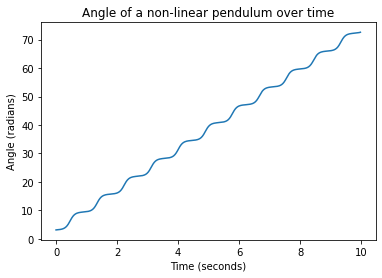

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(x=ts, y=thetas, ax=ax)

ax.set_title("Angle of a non-linear pendulum over time")
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Angle (radians)")

plt.show()

### PROBLEM 3 (50 pts.; 50/50 for code & discussion)

**Quantum Oscillators**

_Refer to Exercise 8.14 of the Newman text_ Consider the one-dimensional, time-independent Schrodinger equation in a harmonic (i.e., quadratic) potential $V(x) = V_0 x^2 / a^2$, where $V_0$ and $a$ are constants. 

1. Modify the code from Example 8.9 to find the energies of the ground state and the first two excited states for this potential when $m$ is the electron mass, $V_0 = 50$ eV, and $a = 10^{-11}$ m. Note that in theory the wavefunction goes all the way out to $x = \pm \infty$, but you can get good answers by using a large but finite interval. Try using $x = - 10a$ to $+10a$, with the wavefunction $\psi = 0$ at both boundaries. (In effect, you are putting the harmonic oscillator in a box with impenetrable walls.) The wavefunction is real everywhere, so you don't need to use complex variables, and you can use evenly spaced points for the solution-- there is no need to use an adaptive method for this problem.

   The quantum harmonic oscillator is known to have energy states that are equally spaced. Check that this is true, to the precision of your calculation, for your answers. (Hint: The ground state has energy in the range 100 to 200eV.) *(20 pts.)*

2. Modify the code from (1) to calculate the same three energies for the anharmonic oscillator with $V(x) = V_0 x^4 /a^4$, with the same parameter values. *(10 pts.)*

3. Calculate the properly normalized wavefunctions of the anharmonic oscillator for the three states. To normalize the wavefunctions you will have to calculate the value of the integral $\int_{-\infty}^{+\infty} |\psi(x)|^2 {\rm d}x$ and then rescale $\psi$ appropriately to ensure that the area under the square of each of the wavefunctions is 1. Either the trapezoidal rule or Simpson's rule will give you a reasonable value for the integral. *(15 pts.)*

   Note that you may find a few very large values at the end of the array holding the wavefunction. Where do these large values come from? Are they real, or spurious? One simple way to deal with the large values is to make use of the fact that the system is symmetric about its midpoint and calculate the integral of the wavefunction over only the left-hand half of the system, then double the result. This neatly misses out the large values. 

4. Make a plot of the normalized wavefunctions from (3), all on the same axes, as a function of $x$ over a modest range near the origin-- say $x = -5a$ to $x =+5a$. *(5 pts.)*



**Solution**

The time-independent Schrodinger equation can be expresed as two first order linear ODEs:

$$ \frac{d\psi}{dx}=\phi $$ \\
$$ \frac{d\phi}{dx}= \frac{2m}{\hbar^2}[V(x)-E] $$

We are given the potential function. However, we don't know the eigenenergies nor wavefunctions of the system. To solve this, we can estimate the wave function using the 4th-order Runge-Kutta method for some value of $E$ as before.

Since the wave function has to vanish at infinity, we can interate over test values of $E$ that satisfy this condition to find the eigenenergy and its corresponding wave function. We start by defining a function describing the system of equations as before.

In [ ]:
# Define physical constants
m = 9.1094e-31      # mass of electron
hbar = 1.0546e-34   # reduced planck constant
e = 1.6022e-19      # charge of electron

L = 10*a
N = 1000
h = L/N

In [ ]:
def v(x):
    return 0.0

def f(r, x, E):
    psi = r[0]
    phi = r[1]
    fpsi = phi
    fphi = (2*m/hbar**2)*(v(x)-E)*psi

    return np.array([fpsi, fphi], float)

While the wavefunction extends out to infinity, we can only evaluate a finite number of points. We estimate this instead as a particle in a wide box. Using $x\in[-10a,10a]$ gives a reasonable estimate.

Then, we define a that finds a solution of the system using the 4th order Runge-Kutta method. Since we're only interested in the wave function $\psi(x)$ and not its first derivative, we can discard $\phi(x)$. This method returns the wave function and the last estimate for a particular energy.

In [ ]:
def solve(E, psi0, phi0):

    x_points = np.arange(-L, L, h)
    psi_points = np.array([], float)
    r = np.array([psi0, phi0], float)

    for x in x_points:
        psi_points = np.append(psi_points, r[0])
        k1 = h*f(r, x, E)
        k2 = h*f(r+0.5*k1, x+0.5*h, E)
        k3 = h*f(r+0.5*k2, x+0.5*h, E)
        k4 = h*f(r+k3, x+h, E)
        r += (k1+2*k2+2*k3+k4)/6

    return r[0], psi_points

Since we don't know the actual eigenenergies yet, we define a method that searches for the eigenenergy within a range. This function uses a binary search to find the energy that makes the wave function approximately vanish at the boundary.

In [ ]:
def search_eigenenergy(E1, E2, **kwargs):
    """
    Approximates the eigenenergy within the given range.
    """
    psi1, _ = solve(E1, **kwargs)
    psi2, _ = solve(E2, **kwargs)

    # Binary search for the eigenenergy that
    # minimizes the wave function at the boundary.
    target = e/1000
    while abs(E2-E1) > target:
        mid_E = (E1+E2)/2
        psi_mid, _ = solve(mid_E, **kwargs)

        # Check if the wave functon is negative. If it is,
        # use a lower energy. Else, use a higher energy.
        if psi_mid*psi1 > 0:
            psi1 = psi_mid
            E1 = mid_E
        else:
            psi2 = psi_mid
            E2 = mid_E

    return E2

We redefine the potential function for a quantum harmonic oscillator. Then, we calculate the ground state and first and second eigenenergies. 

In [ ]:
v_0 = 50.0*e        # V_0 in eV
a = 1.0e-11         # length constant in potential function

def v(x):
    return (x**2*v_0/a**2)

In [ ]:
E0 = search_eigenenergy(100*e, 300*e, psi0=1e-2, phi0=1e-2)
print("Found ground state energy: {} eV".format(E0/e))

E1 = search_eigenenergy(350*e, 450*e, psi0=0.0, phi0=1.0)
print("Found 1st excited state: {} eV".format(E1/e))

E2 = search_eigenenergy(500*e, 700*e, psi0=0.9, phi0=0.5)
print("Found 2nd excited state: {} eV".format(E2/e))

Found ground state energy: 138.0241394042969 eV
Found 1st excited state: 414.07241821289057 eV
Found 2nd excited state: 690.1199340820312 eV


The ground state energy is approximately 138.02 eV. The next two energy levels obey the relation

$$ \begin{equation} E_n = 2E_0(n + 1/2) \end{equation} $$

which is expected for a quadratic potential well. We can repeat this for the anharmonic oscillator with a quartic potential.  

In [ ]:
def v(x):
    return (x**4*v_0/a**4)

In [ ]:
E0 = search_eigenenergy(100*e, 400*e, psi0=1.0, phi0=1e-2)
print("Found ground state energy: {} eV".format(E0/e))

E1 = search_eigenenergy(400*e, 800*e, psi0=1e-20, phi0=1.0)
print("Found 1st excited state: {} eV".format(E1/e))

E2 = search_eigenenergy(1000*e, 1600*e, psi0=1e-20, phi0=1.0)
print("Found 2nd excited state: {} eV".format(E2/e))

Found ground state energy: 205.3073883056641 eV
Found 1st excited state: 735.6918334960934 eV
Found 2nd excited state: 1443.5695648193357 eV


Pertubation theory tells us that the energies of an anharmonic oscillator will weakly approximate quantum harmonic oscillator at low energies. This calculated eigenenergies roughly approximate this (with some difference from the higher order terms). 

However, the wave functions are not yet normalized and the values blow up at the positive boundary near $10a$. The large values are an artifact of the energy being minimized during the numerical integration.

To normalize this, we use trapezoidal integration over the left-hand side of the system. Since the system is symmetric about the x-axis, we can just reflect appropriately after. The normalized wave functions are 

$$ \begin{equation}\psi_{\text{norm}}(x)=\frac{\psi(x)}{\sqrt{2
\int_{-∞}^{0}|\psi(x)|^2dx}}\end{equation}$$

In [ ]:
_, psi0 = solve(E0, 1.0, 1e-20)
_, psi1 = solve(E1, 1e-20, 1.0)
_, psi2 = solve(E2, 1.0, 1e-20)
x_points = np.arange(-L, L, h)

In [ ]:
h = L/N

sq_psi0 = psi0[:1000]*psi0[:1000]
sq_psi1 = psi1[:1000]*psi1[:1000]
sq_psi2 = psi2[:1000]*psi2[:1000]

pdf0 = (0.5*sq_psi0[0] + 0.5*sq_psi0[-1] + np.sum(sq_psi0[1:-1]))*2
pdf1 = (0.5*sq_psi1[0] + 0.5*sq_psi1[-1] + np.sum(sq_psi1[1:-1]))*2
pdf2 = (0.5*sq_psi2[0] + 0.5*sq_psi2[-1] + np.sum(sq_psi2[1:-1]))*2

psi0 = psi0/np.sqrt(pdf0)
psi1 = psi1/np.sqrt(pdf1)
psi2 = psi2/np.sqrt(pdf2)

In [ ]:
psi0 = psi0[:1000]
psi1 = psi1[:1000]
psi2 = psi2[:1000]
x_points = x_points[:1000]

In [ ]:
psi0 = np.append(psi0[-1::-1], psi0)
psi1 = np.append(psi1[-1::-1], -psi1)
psi2 = np.append(psi2[-1::-1], psi2)
x_points = np.append(x_points[-1::-1], -x_points)

After which, we plot the each wave function.

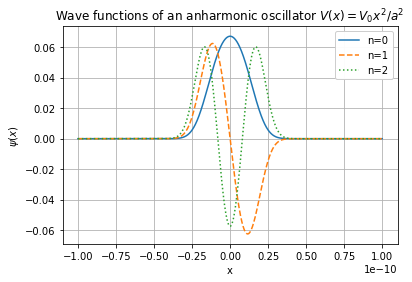

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(x=x_points, y=psi0, ax=ax, label="n=0")
sns.lineplot(x=x_points, y=psi1, ax=ax, linestyle='--', label="n=1")
sns.lineplot(x=x_points, y=psi2, ax=ax, linestyle=':', label="n=2")

ax.set_title("Wave functions of an anharmonic oscillator $V(x)=V_0x^2/a^2$")
ax.set_xlabel("x")
ax.set_ylabel("$\psi(x)$")
ax.legend(loc='best', fancybox=True, framealpha=0.96)

plt.grid()
plt.show()

The method produces physically permissible wave functions. Note the even solutions for n=0 and n=2 and odd solution for n=1.